Download LEHD data at block group level and join with block group shapefile.

### Install / load packages

In [6]:
pip install pygris

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: click-plugins>=1.0 in c:\users\jpg23\anaconda3\lib\site-packages (from fiona->pygris) (1.1.1)



In [111]:
from pygris.data import get_lodes
from pygris import block_groups
from pygris import places
import pandas as pd
import geopandas as gpd

### Load LEHD data using `get_lodes` function from `pygris`

In [50]:
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

In [51]:
lehd = []

for which_state in states:
    
    try:
    
        state_lehd = get_lodes(
            state = which_state, 
            year = 2019, 
            lodes_type = "wac", 
            agg_level = "block group"
        )

        state_lehd["state"] = which_state

        lehd.append(state_lehd)
    
    except:
        
        pass

In [52]:
df = pd.concat(lehd)[["state", "w_geocode", "C000"]]

In [49]:
df

,state,w_geocode,C000
0,AL,010010201001,209
1,AL,010010201002,3
2,AL,010010202001,450
3,AL,010010202002,1120
4,AL,010010203001,73
...,...,...,...
4663,AZ,040270121001,267
4664,AZ,040270121002,63
4665,AZ,040279800041,172
4666,AZ,040279800051,196


In [53]:
df.state.unique()

array(['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID',
       'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN',
       'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA',
       'WA', 'WV', 'WI', 'WY'], dtype=object)

In [54]:
df.state.nunique()

48

### Load block group shapefiles (and land area)

In [71]:
blgr = []

for which_state in states:
    
    try:
    
        state_blgr = block_groups(state = which_state, cb = True, year = 2019)

        state_blgr["state"] = which_state

        blgr.append(state_blgr)
    
    except:
        
        pass

Using FIPS code '01' for input 'AL'
Using FIPS code '02' for input 'AK'
Using FIPS code '04' for input 'AZ'
Using FIPS code '05' for input 'AR'
Using FIPS code '06' for input 'CA'
Using FIPS code '08' for input 'CO'
Using FIPS code '09' for input 'CT'
Using FIPS code '10' for input 'DE'
Using FIPS code '12' for input 'FL'
Using FIPS code '13' for input 'GA'
Using FIPS code '15' for input 'HI'
Using FIPS code '16' for input 'ID'
Using FIPS code '17' for input 'IL'
Using FIPS code '18' for input 'IN'
Using FIPS code '19' for input 'IA'
Using FIPS code '20' for input 'KS'
Using FIPS code '21' for input 'KY'
Using FIPS code '22' for input 'LA'
Using FIPS code '23' for input 'ME'
Using FIPS code '24' for input 'MD'
Using FIPS code '25' for input 'MA'
Using FIPS code '26' for input 'MI'
Using FIPS code '27' for input 'MN'
Using FIPS code '28' for input 'MS'
Using FIPS code '29' for input 'MO'
Using FIPS code '30' for input 'MT'
Using FIPS code '31' for input 'NE'
Using FIPS code '32' for inp

In [72]:
blgr_sf = pd.concat(blgr)[["state", "GEOID", "ALAND", "geometry"]]

In [73]:
blgr_sf.head()

,state,GEOID,ALAND,geometry
0,AL,010730129101,3671177,"POLYGON ((-86.75138 33.41740, -86.74840 33.420..."
1,AL,010259576025,5858511,"POLYGON ((-87.74117 31.91317, -87.74044 31.917..."
2,AL,010770118022,4693254,"POLYGON ((-87.30741 34.83312, -87.30543 34.832..."
3,AL,010550102005,2359614,"POLYGON ((-86.11262 33.99456, -86.10287 33.994..."
4,AL,011310347001,402854096,"POLYGON ((-87.52537 32.12812, -87.52580 32.129..."


In [74]:
blgr_sf.state.unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI',
       'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI',
       'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC',
       'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [75]:
blgr_sf.state.nunique()

50

In [159]:
blgr_sanfran = blgr_sf.loc[blgr_sf.GEOID.str.contains('^06075'), :]

<AxesSubplot:>

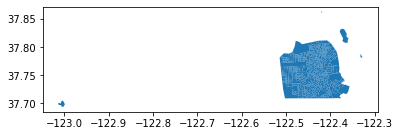

In [160]:
blgr_sanfran.plot()

### Join LEHD data and shapefile

In [82]:
df.dtypes

state        object
w_geocode    object
C000          int64
dtype: object

In [83]:
blgr_sf.dtypes

state         object
GEOID         object
ALAND          int64
geometry    geometry
dtype: object

In [84]:
df.head()

,state,w_geocode,C000
0,AL,010010201001,209
1,AL,010010201002,3
2,AL,010010202001,450
3,AL,010010202002,1120
4,AL,010010203001,73


In [85]:
blgr_sf.head()

,state,GEOID,ALAND,geometry
0,AL,010730129101,3671177,"POLYGON ((-86.75138 33.41740, -86.74840 33.420..."
1,AL,010259576025,5858511,"POLYGON ((-87.74117 31.91317, -87.74044 31.917..."
2,AL,010770118022,4693254,"POLYGON ((-87.30741 34.83312, -87.30543 34.832..."
3,AL,010550102005,2359614,"POLYGON ((-86.11262 33.99456, -86.10287 33.994..."
4,AL,011310347001,402854096,"POLYGON ((-87.52537 32.12812, -87.52580 32.129..."


In [86]:
df.shape[0]

231943

In [87]:
blgr_sf.shape[0]

217003

In [103]:
df[df['state'] == 'AR']

,state,w_geocode,C000
0,AR,050350306021,8
1,AR,050350306023,20


In [102]:
blgr_sf[blgr_sf['state'] == 'AR'].head()

,state,GEOID,ALAND,geometry
0,AR,050350302015,420589,"POLYGON ((-90.19350 35.15918, -90.19349 35.160..."
1,AR,051330804002,327649626,"POLYGON ((-94.26684 33.84598, -94.26354 33.846..."
2,AR,050070206033,6806988,"POLYGON ((-94.25402 36.33649, -94.24497 36.336..."
3,AR,051159515011,8826694,"POLYGON ((-93.23258 35.27715, -93.22719 35.284..."
4,AR,051011802002,434692872,"POLYGON ((-93.40776 35.75187, -93.40509 35.754..."


In [161]:
final_df = blgr_sf.merge(df, how = 'left', left_on = ['state', 'GEOID'], right_on = ['state', 'w_geocode']).drop(columns = ['w_geocode']).rename(columns={"C000": "total_jobs", "ALAND": "land_area", "GEOID": "block_group"})

In [162]:
final_df.shape[0]

217003

In [163]:
final_df.head()

,state,block_group,land_area,geometry,total_jobs
0,AL,010730129101,3671177,"POLYGON ((-86.75138 33.41740, -86.74840 33.420...",1234.0
1,AL,010259576025,5858511,"POLYGON ((-87.74117 31.91317, -87.74044 31.917...",NaN
2,AL,010770118022,4693254,"POLYGON ((-87.30741 34.83312, -87.30543 34.832...",626.0
3,AL,010550102005,2359614,"POLYGON ((-86.11262 33.99456, -86.10287 33.994...",NaN
4,AL,011310347001,402854096,"POLYGON ((-87.52537 32.12812, -87.52580 32.129...",64.0


In [164]:
final_df.state.nunique()

50

In [165]:
df_states = df.state.unique().tolist()
final_df_states = final_df.state.unique().tolist()

list(set(df_states).difference(final_df_states))

[]

In [166]:
type(final_df)

geopandas.geodataframe.GeoDataFrame

### Subset to cities of interest

In [167]:
city_list = [
  'Albuquerque NM',
  'Atlanta GA',
  'Austin TX',
  'Bakersfield CA',
  'Baltimore MD',
  'Boston MA',
  'Charlotte NC',
  'Chicago IL',
  'Cincinnati OH',
  'Cleveland OH',
  'Colorado Springs CO',
  'Columbus OH',
  'Dallas TX',
  'Denver CO',
  'Detroit MI',
  'El Paso TX',
  'Fort Worth TX',
  'Fresno CA',
  'Urban Honolulu HI',
  'Houston TX',
  'Indianapolis city (balance) IN',
  'Jacksonville FL',
  'Kansas City MO',
  'Las Vegas NV',
  'Los Angeles CA',
  'Louisville KY',
  'Memphis TN',
  'Miami FL',
  'Milwaukee WI',
  'Minneapolis MN',
  'Nashville-Davidson metropolitan government (balance) TN',
  'New Orleans LA',
  'New York NY',
  'Oakland CA',
  'Oklahoma City OK',
  'Omaha NE',
  'Orlando FL',
  'Philadelphia PA',
  'Phoenix AZ',
  'Pittsburgh PA',
  'Portland OR',
  'Raleigh NC',
  'Sacramento CA',
  'Salt Lake City UT',
  'San Antonio TX',
  'San Diego CA',
  'San Francisco CA',
  'San Jose CA',
  'Seattle WA',
  'St. Louis MO',
  'Tampa FL',
  'Tucson AZ',
  'Tulsa OK',
  'Washington DC']

In [112]:
all_places = places(cb = True)

Using the default year of 2021
Retrieving Census-designated places for the entire United States


In [115]:
all_places.head()

,STATEFP,PLACEFP,PLACENS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,12,35000,02404783,1600000US1235000,1235000,Jacksonville,Jacksonville city,FL,Florida,25,1935492088,329347337,"POLYGON ((-82.04933 30.27334, -82.04924 30.273..."
1,01,32416,02403774,1600000US0132416,0132416,Guntersville,Guntersville city,AL,Alabama,25,66393352,44192114,"MULTIPOLYGON (((-86.24300 34.36247, -86.23766 ..."
2,01,81504,02406871,1600000US0181504,0181504,Westover,Westover town,AL,Alabama,43,51094431,382665,"MULTIPOLYGON (((-86.54358 33.35226, -86.54074 ..."
3,01,26896,02403619,1600000US0126896,0126896,Florence,Florence city,AL,Alabama,25,68681105,546506,"POLYGON ((-87.72248 34.81723, -87.71904 34.821..."
4,20,47350,00485624,1600000US2047350,2047350,Mission Hills,Mission Hills city,KS,Kansas,25,5276389,2474,"POLYGON ((-94.63043 39.00964, -94.63043 39.015..."


In [135]:
pd.set_option('display.max_colwidth', None)
all_places.loc[all_places.NAME.str.contains('Nashville|Indianapolis|Honolulu|St\.? Louis'), :][['NAME', 'STUSPS']]

,NAME,STUSPS
868,Nashville,OH
1075,Nashville-Davidson metropolitan government (balance),TN
5468,Nashville,KS
7767,Indianapolis city (balance),IN
7907,St. Louisville,OH
10770,Nashville,GA
11519,Nashville,MI
11684,St. Louis,OK
13505,Nashville,IN
13872,Urban Honolulu,HI


In [116]:
all_places['city'] = all_places.apply(lambda x: '{} {}'.format(x['NAME'], x['STUSPS']), axis=1)

In [118]:
all_places.city.head()

0     Jacksonville FL
1     Guntersville AL
2         Westover AL
3         Florence AL
4    Mission Hills KS
Name: city, dtype: object

In [137]:
all_places_simp = all_places[['city', 'geometry']]
the_places = all_places_simp[all_places_simp['city'].isin(city_list)]

In [140]:
pd.reset_option('^display.', silent=True)
the_places.head()

,city,geometry
0,Jacksonville FL,"POLYGON ((-82.04933 30.27334, -82.04924 30.273..."
120,Oklahoma City OK,"POLYGON ((-97.83367 35.33536, -97.83119 35.335..."
192,San Diego CA,"MULTIPOLYGON (((-116.93264 32.64913, -116.9319..."
567,Oakland CA,"POLYGON ((-122.34225 37.80556, -122.33412 37.8..."
761,Tucson AZ,"POLYGON ((-111.05873 32.20679, -111.05446 32.2..."


In [141]:
the_places.city.unique()

array(['Jacksonville FL', 'Oklahoma City OK', 'San Diego CA',
       'Oakland CA', 'Tucson AZ', 'Louisville KY',
       'Nashville-Davidson metropolitan government (balance) TN',
       'Memphis TN', 'Sacramento CA', 'Fort Worth TX', 'Portland OR',
       'Chicago IL', 'Colorado Springs CO', 'Denver CO', 'New Orleans LA',
       'Detroit MI', 'Philadelphia PA', 'Tulsa OK', 'Cleveland OH',
       'Dallas TX', 'El Paso TX', 'Omaha NE', 'Washington DC',
       'Bakersfield CA', 'Tampa FL', 'Milwaukee WI', 'Los Angeles CA',
       'Seattle WA', 'Indianapolis city (balance) IN', 'Pittsburgh PA',
       'Albuquerque NM', 'Boston MA', 'New York NY', 'Atlanta GA',
       'San Jose CA', 'Columbus OH', 'Miami FL', 'Minneapolis MN',
       'Salt Lake City UT', 'Orlando FL', 'Urban Honolulu HI',
       'St. Louis MO', 'Houston TX', 'Fresno CA', 'Las Vegas NV',
       'Cincinnati OH', 'San Francisco CA', 'San Antonio TX',
       'Baltimore MD', 'Phoenix AZ', 'Kansas City MO', 'Charlotte NC',
      

In [142]:
the_places.city.nunique()

54

In [143]:
in_places = the_places.city.unique().tolist()

list(set(city_list).difference(in_places))

[]

In [168]:
final_df.crs == the_places.crs

True

In [169]:
df_joined = gpd.sjoin(final_df, the_places, how = "inner").drop(columns = ['index_right'])

In [170]:
df_joined.head()

,state,block_group,land_area,geometry,total_jobs,city
3971,AZ,040131124021,646935,"POLYGON ((-112.18640 33.46962, -112.18640 33.4...",38.0,Phoenix AZ
3976,AZ,040131092001,559928,"POLYGON ((-112.14461 33.50831, -112.14290 33.5...",2022.0,Phoenix AZ
3978,AZ,040131167254,1257765,"POLYGON ((-112.05021 33.29714, -112.04918 33.2...",24.0,Phoenix AZ
3980,AZ,040131117004,647191,"POLYGON ((-112.06509 33.47661, -112.06507 33.4...",151.0,Phoenix AZ
3983,AZ,040131126012,537681,"POLYGON ((-112.15183 33.46375, -112.14799 33.4...",62.0,Phoenix AZ


In [171]:
sf_test = df_joined[df_joined['city']=='San Francisco CA']

<AxesSubplot:>

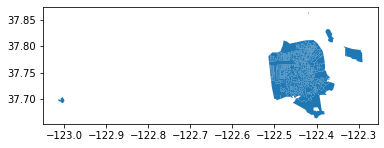

In [172]:
sf_test.plot()

In [173]:
sf_test2 = final_df.loc[final_df.block_group.str.contains('^06075'), :]

<AxesSubplot:>

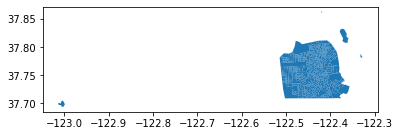

In [174]:
sf_test2.plot()

In [175]:
df_joined['jobs_per_sq_meter'] = df_joined['total_jobs']/df_joined['land_area']

In [176]:
df_joined.head()

,state,block_group,land_area,geometry,total_jobs,city,jobs_per_sq_meter
3971,AZ,040131124021,646935,"POLYGON ((-112.18640 33.46962, -112.18640 33.4...",38.0,Phoenix AZ,0.000059
3976,AZ,040131092001,559928,"POLYGON ((-112.14461 33.50831, -112.14290 33.5...",2022.0,Phoenix AZ,0.003611
3978,AZ,040131167254,1257765,"POLYGON ((-112.05021 33.29714, -112.04918 33.2...",24.0,Phoenix AZ,0.000019
3980,AZ,040131117004,647191,"POLYGON ((-112.06509 33.47661, -112.06507 33.4...",151.0,Phoenix AZ,0.000233
3983,AZ,040131126012,537681,"POLYGON ((-112.15183 33.46375, -112.14799 33.4...",62.0,Phoenix AZ,0.000115


### Export as geodataframe

In [177]:
df_joined.to_file("C:/Users/jpg23/data/downtownrecovery/lehd_new_downtowns/cities_lehd_jobs.geojson", driver="GeoJSON")  